In [142]:
# (a) Join the Titanic: Machine Learning From Disaster competition on Kaggle. Download the
# training and test data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation
import seaborn as sns
titanic_df = pd.read_csv("train.csv")
test_df    = pd.read_csv("test.csv")

In [143]:
def get_sex(sex):
    s = 1 if (sex.values[0]) =='male' else 0
    return s

def get_rand(df):
    average = df["Age"].mean()
    std = df["Age"].std()
    na_count  = df["Age"].isnull().sum()
    rand = np.random.randint(average - std, average + std, size = na_count)
    return rand

In [147]:
#change quanlitative feature sex to quantitative data
titanic_df[['Sex']] = titanic_df[['Sex']].apply(get_sex,axis=1)
test_df[['Sex']] = test_df[['Sex']].apply(get_sex,axis=1)
titanic_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.0,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.0,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.0,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.0,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.0,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.0,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,0.0,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,0.0,80.000000,8.000000,6.000000,512.329200


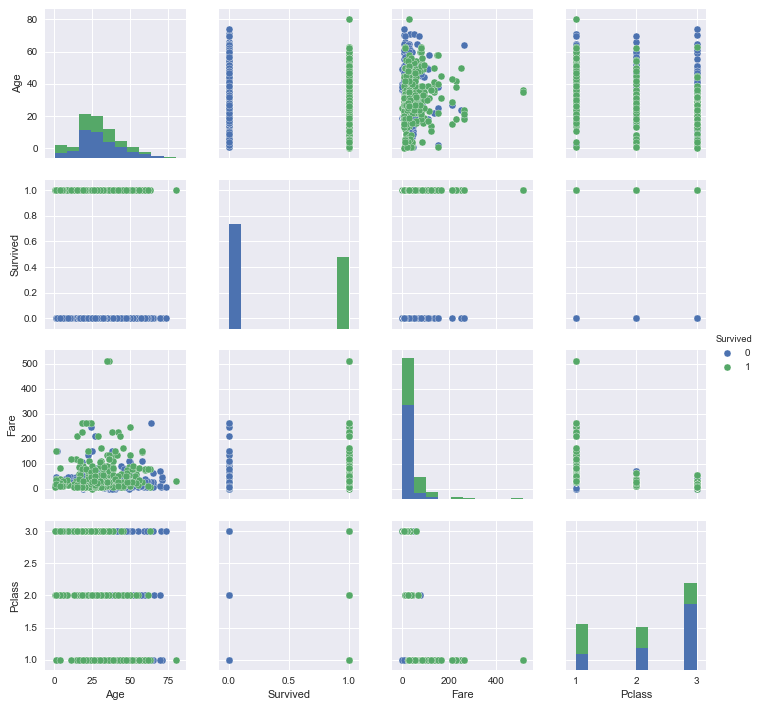

In [149]:
#titanic_df['Age'].hist(bins=70)
#plt.show()

titanic_df.describe()
sns.pairplot(titanic_df[['Age','Survived','Fare','Pclass']].dropna(), hue="Survived")
#pd.scatter_matrix(df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width(cm)"]],figsize=(10, 10),c=['r','b','g'],)
plt.show()

In [ ]:
# drop ID,Name,Ticket due to irrelevance
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)


#fill missing fare value with median
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)


#drop cabin and embark since they are not statistically important
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)
titanic_df.drop("Embarked",axis=1,inplace=True)
test_df.drop("Embarked",axis=1,inplace=True)

#combine Parch and Sibsp to one artificial feature and drop the original features
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0
test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0
titanic_df.drop(['SibSp','Parch'], axis=1,inplace=True)
test_df.drop(['SibSp','Parch'], axis=1,inplace=True)

#fill agge value with random values generated from (mean-std,mean+std) invetrval
titanic_df["Age"].loc[np.isnan(titanic_df["Age"])] = get_rand(titanic_df)
test_df["Age"].loc[np.isnan(test_df["Age"])] = get_rand(test_df)



In [ ]:
# (b) Using logistic regression, try to predict whether a passenger survived the disaster. You can
# choose the features (or combinations of features) you would like to use or ignore, provided
# you justify your reasoning.
X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
logreg.score(X_train, Y_train)

In [104]:
predicted = cross_validation.cross_val_predict(LogisticRegression(), X_train, Y_train, cv=10)
print metrics.accuracy_score(Y_train, predicted)

0.781144781145


In [122]:
# (c) Train your classifier using all of the training data, and test it using the testing data. Submit
# your results to Kaggle.
Y_pred = logreg.predict(X_test)
Y_pred = pd.DataFrame(Y_pred)


In [121]:
#0.75119
Y_pred.to_csv("titanci_pred.csv")